In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Example function to load data
def load_data(file_path):
    return pd.read_csv(file_path)

In [4]:
# Example function to train a RandomForestClassifier model
def train_model_RandomForestClassifier(X_train, y_train):
    # Initialize a TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)  # Transform text data into TF-IDF features

    # Initialize a RandomForestClassifier and fit the model
    model = RandomForestClassifier()
    model.fit(X_train_tfidf, y_train)

    return model, vectorizer  # Return trained model and vectorizer

In [5]:
# Example function to train a LogisticRegression model
def train_model_LogisticRegression(X_train, y_train):
    # Initialize a TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)  # Transform text data into TF-IDF features

    # Initialize a LogisticRegression model and fit the data
    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)

    return model, vectorizer  # Return trained model and vectorizer

In [8]:
# Example function to evaluate the RandomForestClassifier model
def evaluate_model_RandomForestClassifier(model, vectorizer, X_test, y_test):
    X_test_tfidf = vectorizer.transform(X_test)  # Transform test data using the same vectorizer
    predictions = model.predict(X_test_tfidf)  # Make predictions
    print(classification_report(y_test, predictions))  # Display classification report

    cm =  confusion_matrix(y_test, predictions)
    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix RandomForestClassifier")
    plt.colorbar()
    tick_marks = np.arange(len(set(y_test)))
    plt.xticks(tick_marks, tick_marks, rotation=45)
    plt.yticks(tick_marks, tick_marks)

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j]),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
# Example function to evaluate the LogisticRegression model
def evaluate_model_LogisticRegression(model, vectorizer, X_test, y_test):
    X_test_tfidf = vectorizer.transform(X_test)  # Transform test data using the same vectorizer
    predictions = model.predict(X_test_tfidf)  # Make predictions
    print(classification_report(y_test, predictions))  # Display classification report

    cm =  confusion_matrix(y_test, predictions)
    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix LogisticRegression")
    plt.colorbar()
    tick_marks = np.arange(len(set(y_test)))
    plt.xticks(tick_marks, tick_marks, rotation=45)
    plt.yticks(tick_marks, tick_marks)

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j]),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
def main():
    # Load and preprocess the data
    df = load_data('finalDataset.csv')

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sensitive'], test_size=0.2)

    # Train the RandomForestClassifier model
    modelRandom_ForestClassifier, vectorizer_RandomForestClassifier = train_model_RandomForestClassifier(X_train, y_train)

    # Train the LogisticRegression model
    modelRandom_LogisticRegression, vectorizer_LogisticRegression = train_model_LogisticRegression(X_train, y_train)

    # Evaluate the RandomForestClassifier model
    evaluate_model_RandomForestClassifier(modelRandom_ForestClassifier, vectorizer_RandomForestClassifier, X_test, y_test)


    # Evaluate the LogisticRegression model
    evaluate_model_LogisticRegression(modelRandom_LogisticRegression, vectorizer_LogisticRegression, X_test, y_test)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.87      0.99      0.93     85181
           1       0.82      0.17      0.28     14819

    accuracy                           0.87    100000
   macro avg       0.85      0.58      0.61    100000
weighted avg       0.87      0.87      0.83    100000

[[84642   539]
 [12285  2534]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     85181
           1       0.82      0.28      0.42     14819

    accuracy                           0.88    100000
   macro avg       0.85      0.64      0.68    100000
weighted avg       0.88      0.88      0.86    100000

[[84229   952]
 [10604  4215]]


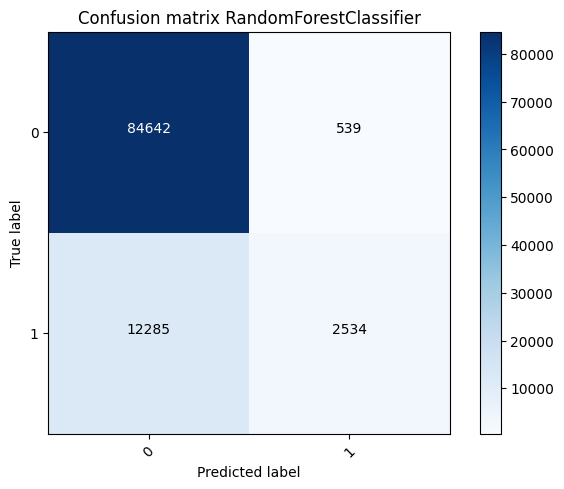

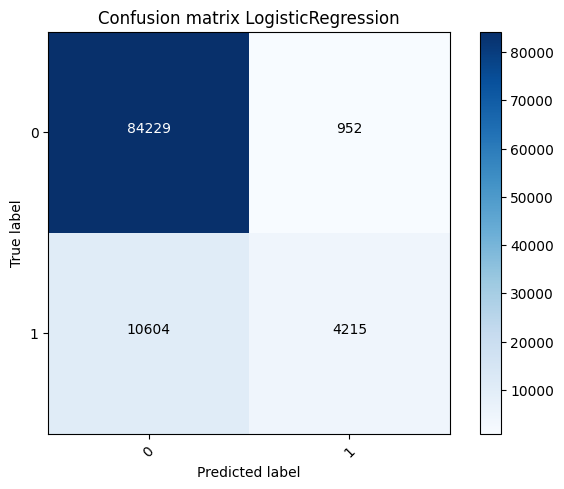

In [11]:
if __name__ == "__main__":
    main()